## Analysis 1

1. Explore Happiness Data for both 2015 and 2016 years

2. calculate the total score of each country and create a new column. and sort it to put the rank to a new column.

3. merge the 2015 and 2016 rank country table and create a new column to show the change of the rank for each contry and out put to a new csv. 

In [274]:
import pandas as pd
# from pythainlp.segment import segment
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [275]:
# define the function to calculate and create the total score of happiness.
def getTotalScore(str):
    # load the data
    data = pd.read_csv(str)
    # get all the columns that to be added together
    colums = data.ix[:,2:]
    # add the new column named 'total score'
    # data['total score'] = colums.sum(axis = 1).head()
    data['total score'] = np.sum(colums,axis = 1)
    # return the data frame
    return data

In [87]:
getTotalScore("data/2015.csv").head()

,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,total score
0,Afghanistan,Southern Asia,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.57455
1,Albania,Central and Eastern Europe,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,4.95938
2,Algeria,Middle East and Northern Africa,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,5.60460
3,Angola,Sub-Saharan Africa,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,4.03290
4,Argentina,Latin America and Caribbean,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,6.57406


In [101]:
def getRank(data):
    newData = data.sort_values(by='total score',ascending=False)
    newData['Rank'] = range(1,len(data2015) + 1)
    newData.index = range(0,len(data2015))
    return newData

In [103]:
getRank(getTotalScore("data/2015.csv")).head()

,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,total score,Rank
0,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.58696,1
1,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.56092,2
2,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.52708,3
3,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.52222,4
4,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.42694,5


In [5]:
#load the data of 2015 year.
data2015 = pd.read_csv("data/2015.csv")
## display the first row of data.
data2015.head()

In [94]:
data2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

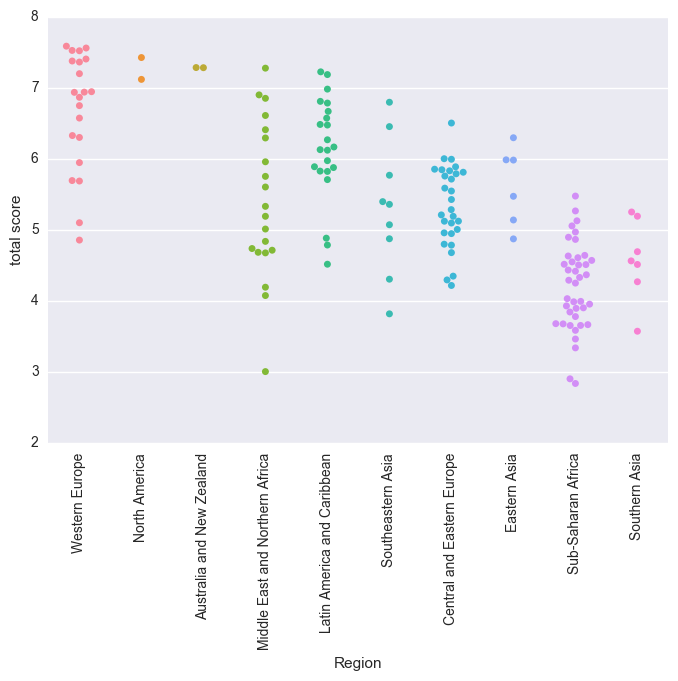

In [251]:
# sns.set_style("whitegrid")
sns.set()
sns.swarmplot(x="Region", y="total score",  data=getRank(getTotalScore("data/2015.csv")))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

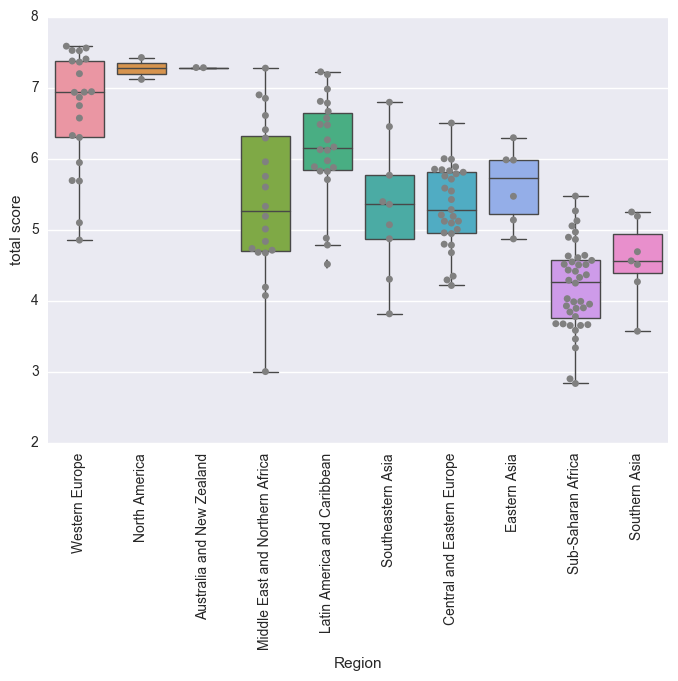

In [271]:
#Distributions of observations within categories
# Boxplots
# to compare the distribution of a variable across levels of other variables.
ax = sns.boxplot(x="Region", y="total score", data=data1,linewidth=1.0)
ax = sns.swarmplot(x="Region", y="total score", data=data1, color=".5")
plt.xticks(rotation=90)

In [288]:
data2 = getTotalScore("data/2015.csv")
data2['y'] = (range(1, 10))

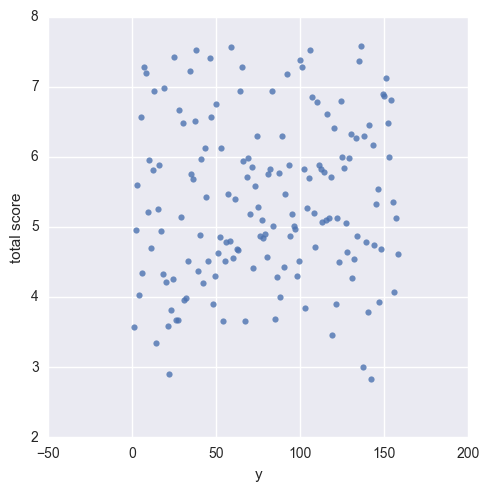

In [289]:
# Scatterplots
sns.lmplot('y', 'total score', data=data2, fit_reg=False)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


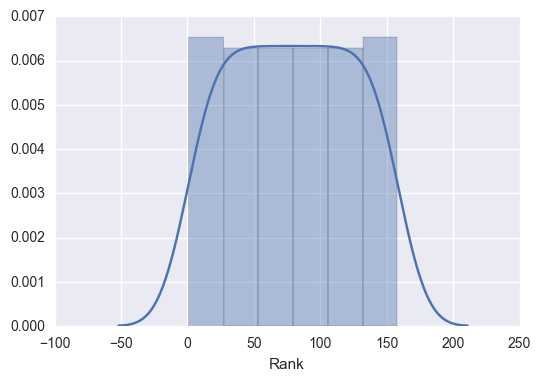

In [284]:
# sns.kdeplot(data1['total score'])
sns.distplot(data1.Rank)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

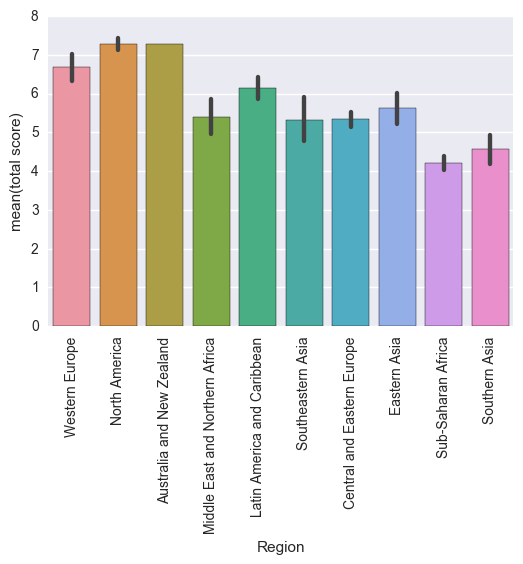

In [279]:
# Statistical estimation within categories
# bar plots
sns.barplot(x="Region", y="total score", data=data1);
plt.xticks(rotation=90)

In [ ]:
# according to the swarmplot, we can divided the score into four groups:
#2-4,4-6,6-8; and we can give the lable of the three groups: 

In [276]:
data1 = getRank(getTotalScore("data/2015.csv"))

In [161]:
bins = [2,3,4,5,6,7,8]
group_names = ['worse', 'low', 'medium','Okay', 'Good','great']
categories = pd.cut(data1['total score'], bins, labels=group_names)
data1['categories'] = pd.cut(data1['total score'], bins, labels=group_names)

In [165]:
pd.value_counts(data1['categories'])

Okay      49
medium    44
Good      29
low       19
great     15
worse      2
Name: categories, dtype: int64

In [206]:
pd.value_counts(data1['Region'])

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [292]:
bins = [2,4,6,8]
group_names = ['low','Okay','Good']
categories = pd.cut(data1['total score'], bins, labels=group_names)
data1['categories'] = pd.cut(data1['total score'], bins, labels=group_names)

In [188]:
pd.value_counts(data1['categories'])

Okay    93
Good    44
low     21
Name: categories, dtype: int64

In [176]:
data_low = data1[data1.categories=='low']
data_okay = data1[data1.categories=='Okay']
data_good = data1[data1.categories=='Good']

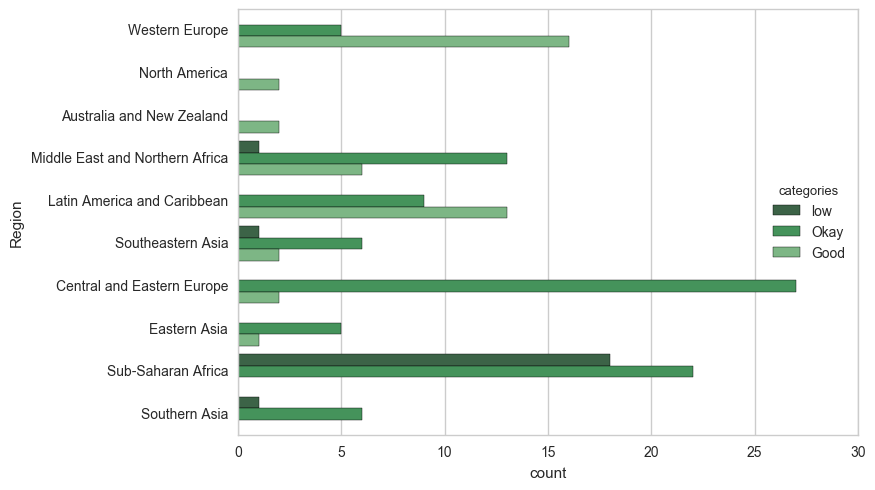

In [233]:
#Plotting with categorical data
sns.countplot(y="Region", hue = "categories", data = data1, palette="Greens_d")

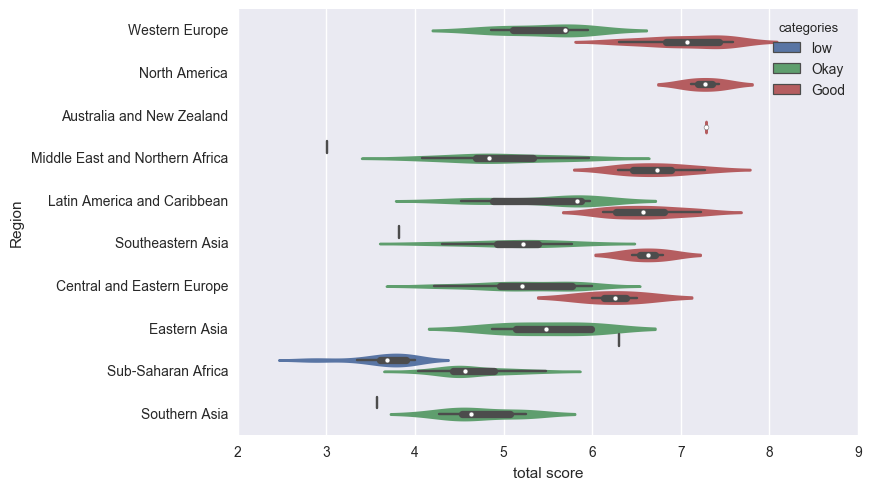

In [238]:
sns.violinplot(x="total score", y="Region", hue="categories", data=data1);

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

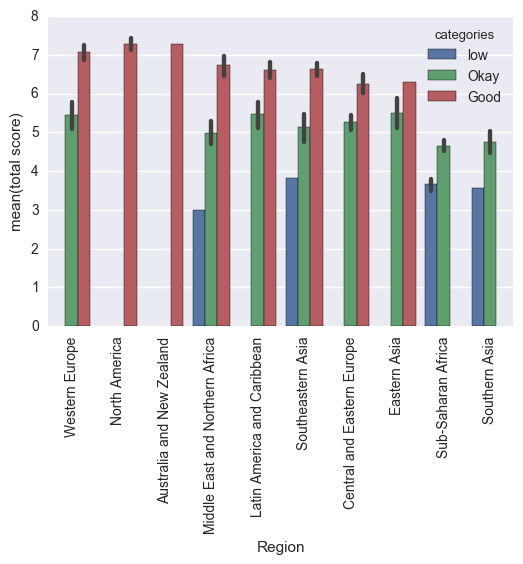

In [294]:
sns.barplot(x="Region", y="total score", hue="categories", data=data1);
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

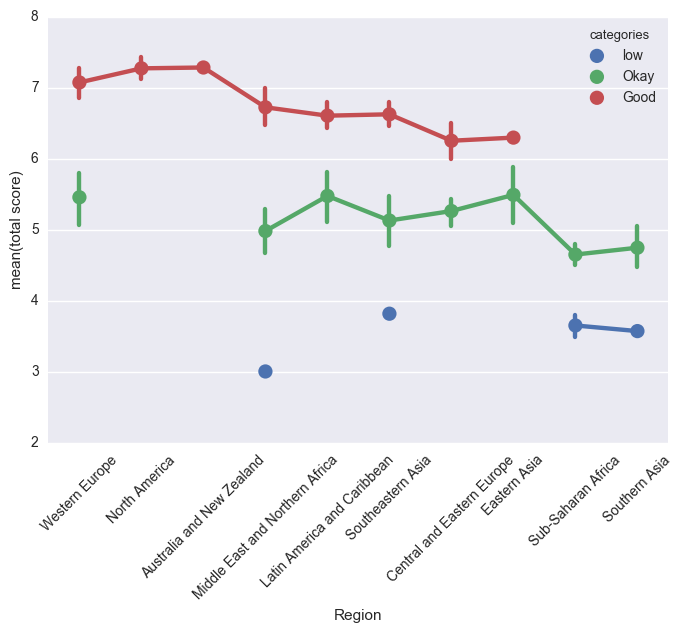

In [242]:
sns.pointplot(x="Region", y="total score", hue="categories", data=data1);
plt.xticks(rotation=45)

In [ ]:
# sns.factorplot(x="Region", y="total score", hue="categories", data=data1)